In [5]:
from datapackage import Package

In [6]:
package = Package('https://datahub.io/core/global-temp/datapackage.json')

In [11]:
for resource in package.resource_names:
    print(resource)

validation_report
annual_csv
monthly_csv
annual_json
monthly_json
global-temp_zip
monthly_csv_preview
annual
monthly


In [53]:
monthly_resource = package.get_resource('monthly_csv') 

In [54]:
monthly_data = monthly_resource.read()

AttributeError: 'NoneType' object has no attribute 'read'

In [55]:
import pandas as pd
df = pd.DataFrame(monthly_data)

In [56]:
df.head()

,0,1,2
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.81
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.93
4,GCAG,2016-10-06,0.7292


In [57]:
df_gcag = df[df[0] == 'GCAG']
df_gcag.head()

,0,1,2
0,GCAG,2016-12-06,0.7895
2,GCAG,2016-11-06,0.7504
4,GCAG,2016-10-06,0.7292
6,GCAG,2016-09-06,0.8767
8,GCAG,2016-08-06,0.8998


In [58]:
df_gistemp = df[df[0] == 'GISTEMP']
df_gistemp.head()

,0,1,2
1,GISTEMP,2016-12-06,0.81
3,GISTEMP,2016-11-06,0.93
5,GISTEMP,2016-10-06,0.89
7,GISTEMP,2016-09-06,0.87
9,GISTEMP,2016-08-06,0.98


In [59]:
df_total = pd.merge(df_gcag, df_gistemp, on=1)
df_total.head()

,0_x,1,2_x,0_y,2_y
0,GCAG,2016-12-06,0.7895,GISTEMP,0.81
1,GCAG,2016-11-06,0.7504,GISTEMP,0.93
2,GCAG,2016-10-06,0.7292,GISTEMP,0.89
3,GCAG,2016-09-06,0.8767,GISTEMP,0.87
4,GCAG,2016-08-06,0.8998,GISTEMP,0.98


In [60]:
df_total.columns = ['gcag_name', 'date', 'gcag', 'gistemp_name', 'gistemp']
df_total = df_total[['date', 'gcag', 'gistemp']]
df_total.head()

,date,gcag,gistemp
0,2016-12-06,0.7895,0.81
1,2016-11-06,0.7504,0.93
2,2016-10-06,0.7292,0.89
3,2016-09-06,0.8767,0.87
4,2016-08-06,0.8998,0.98


In [61]:
df_total['gcag'] = pd.to_numeric(df_total['gcag'])
df_total['gistemp'] = pd.to_numeric(df_total['gistemp'])

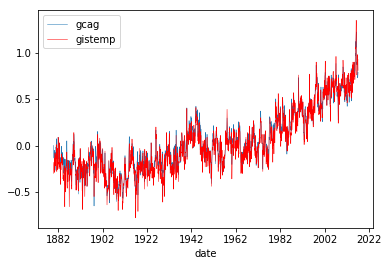

In [71]:
import matplotlib.pyplot as plt
ax = plt.gca()
df_total.plot(subplots=True, kind='line', x='date', y='gcag', ax=ax, linewidth=0.5)
df_total.plot(subplots=True, kind='line', x='date', y='gistemp', ax=ax, color='red', linewidth=0.5)

# plt.show()
plt.savefig('gcag_gistemp_analysis.png', dpi=200, bbox_inches='tight')